<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Campus_Bikes_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campus Bikes

On a campus represented on the X-Y plane, there are n workers and m bikes, with n <= m.

You are given an array workers of length n where workers[i] = [xi, yi] is the position of the ith worker. You are also given an array bikes of length m where bikes[j] = [xj, yj] is the position of the jth bike. All the given positions are unique.

Assign a bike to each worker. Among the available bikes and workers, we choose the (workeri, bikej) pair with the shortest Manhattan distance between each other and assign the bike to that worker.

If there are multiple (workeri, bikej) pairs with the same shortest Manhattan distance, we choose the pair with the smallest worker index. If there are multiple ways to do that, we choose the pair with the smallest bike index. Repeat this process until there are no available workers.

Return an array answer of length n, where answer[i] is the index (0-indexed) of the bike that the ith worker is assigned to.

The Manhattan distance between two points p1 and p2 is Manhattan(p1, p2) = |p1.x - p2.x| + |p1.y - p2.y|.

Example 1:

```
Input: workers = [[0,0],[2,1]], bikes = [[1,2],[3,3]]
Output: [1,0]
Explanation: Worker 1 grabs Bike 0 as they are closest (without ties), and Worker 0 is assigned Bike 1. So the output is [1, 0].
```



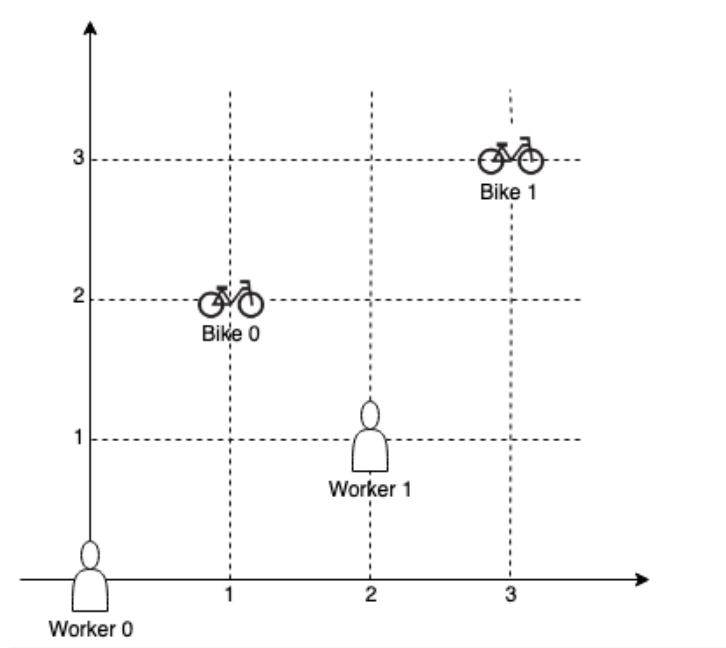

Example 2:

```
Input: workers = [[0,0],[1,1],[2,0]], bikes = [[1,0],[2,2],[2,1]]
Output: [0,2,1]
Explanation: Worker 0 grabs Bike 0 at first. Worker 1 and Worker 2 share the same distance to Bike 2, thus Worker 1 is assigned to Bike 2, and Worker 2 will take Bike 1. So the output is [0,2,1].
```



# Solution

In [ ]:
# Time = O(n(m logm + logn))
# since n <= m
# Thus, Time = O(nmlog m)
# Sapce = O(nm)

# n = len(workers)
# m = len(bikes)

import heapq

class Solution:
    def assignBikes(self, workers, bikes):
        
        workers_bikes_distance = []
        priority_queue = []
        for worker_idx, worker_loc in enumerate(workers):
            current_worker_bikes_distance = []
            for bike_idx, bike_loc in enumerate(bikes):
                distance = get_distance(worker_loc, bike_loc)
                current_worker_bikes_distance.append([distance, worker_idx, bike_idx])
            
            current_worker_bikes_distance.sort(reverse=True)
            heapq.heappush(priority_queue, current_worker_bikes_distance.pop())
            workers_bikes_distance.append(current_worker_bikes_distance)
        
        bike_status = [False for _ in bikes]
        worker_status = [None for _ in workers]
        print(bike_status)
        
        while len(priority_queue) > 0:
            distance, worker_idx, bike_idx = heapq.heappop(priority_queue)
            

            if not bike_status[bike_idx]:
                bike_status[bike_idx] = True
                worker_status[worker_idx] = bike_idx
            else:
                next_closest_bike = workers_bikes_distance[worker_idx].pop()
                heapq.heappush(priority_queue, next_closest_bike)
        

        return worker_status
            
    
def get_distance(location1, location2):
    return abs(location1[0] - location2[0]) + abs(location1[1] - location2[1])

In [ ]:
workers = [[0,0],[1,1],[2,0]]
bikes = [[1,0],[2,2],[2,1]]
Solution().assignBikes(workers, bikes)

In [ ]:
workers = [[0,0],[2,1]]
bikes = [[1,2],[3,3]]
Solution().assignBikes(workers, bikes)

# Conceptual Note

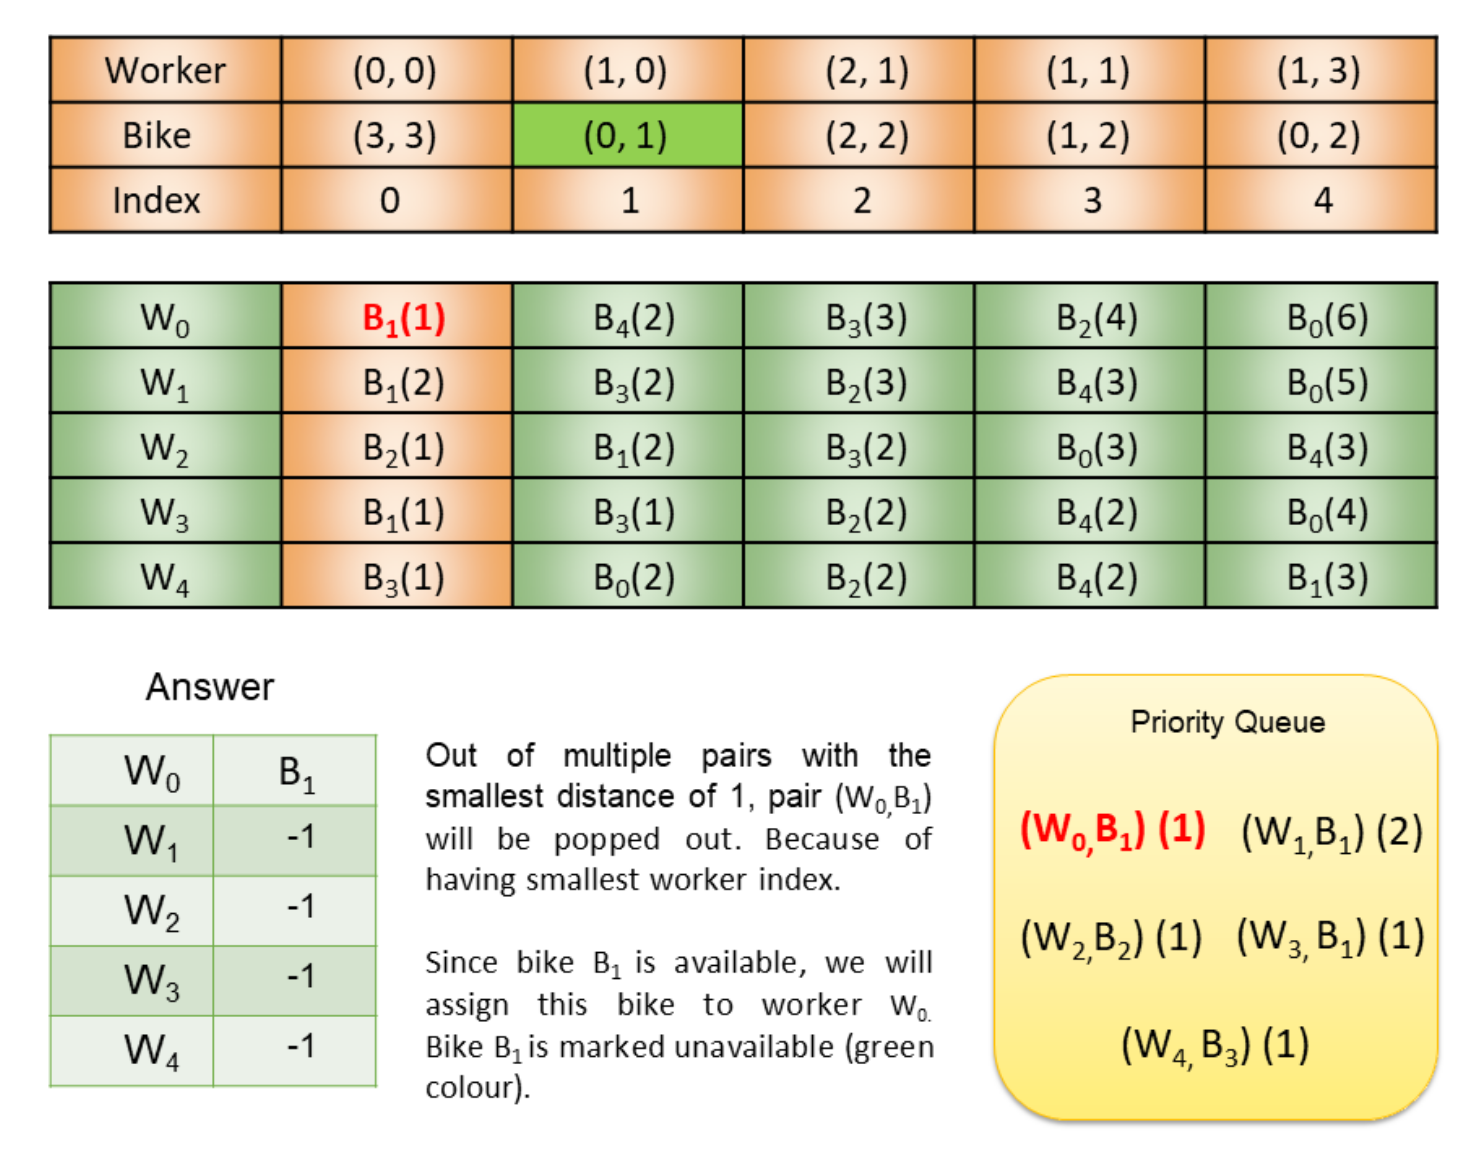